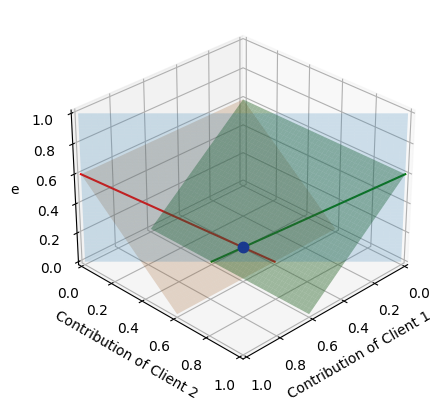

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建一个3D坐标系
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

num_grids = 1000
xx, yy = np.meshgrid(np.linspace(0, 1, num_grids), np.linspace(0, 1, num_grids))


v23 = 1

v2 = 0.6
v3 = 0.6
fig_path = "./figs/theory/least_core_point.pdf"
markersize = 7.5

# v2 = 0.4
# v3 = 0.4
# fig_path = "./figs/theory/least_core_bound.pdf"
# markersize = 7.5

# 定义平面1
point1 = np.array([v23, 0, 0])
normal1 = np.array([1, 1, 0])
d1 = -np.sum(point1 * normal1)
xs = np.linspace(0, 1, num_grids)
zs = np.linspace(0, 1, num_grids)
xx1, zz1 = np.meshgrid(xs, zs)
yy1 = v23 - xx
zz1[zz1 < 0] = np.nan
ax.plot_surface(xx1, yy1, zz1, alpha=0.2)

# 定义平面2
point2 = np.array([0, 0, v2])
normal2 = np.array([0, 1, 1])
d2 = -np.sum(point2 * normal2)
zz2 = (-normal2[0] * xx - normal2[1] * yy - d2) * 1. / normal2[2]
zz2[zz2 < 0] = np.nan
ax.plot_surface(xx, yy, zz2, alpha=0.2)

# 定义平面3
point3 = np.array([0, 0, v3])
normal3 = np.array([1, 0, 1])
d3 = -np.sum(point3 * normal3)
zz3 = (-normal3[0] * xx - normal3[1] * yy - d3) * 1. / normal3[2]
zz3[zz3 < 0] = np.nan
ax.plot_surface(xx, yy, zz3, alpha=0.4)

# 计算两个平面的交线
xx12 = np.linspace(0, 1, num_grids)
yy12 = np.linspace(1, 0, num_grids)
zz12 = v2 - yy12
zz12[zz12<0] = np.nan

xx13 = np.linspace(0, 1, num_grids)
yy13 = np.linspace(1, 0, num_grids)
zz13 = v3 - xx13
zz13[zz13<0] = np.nan

ax.plot(xx12, yy12, zz12,  color='red', alpha=1)
ax.plot(xx13, yy13, zz13,  color='green', alpha=1)

xx_fea = np.linspace(0, 1, num_grids)
# 当bound
if set([True if (np.isnan(zz13[i])) and (np.isnan(zz12[i])) else False for i in range(num_grids)]) == {True, False}:
    fea_idx = [True if (np.isnan(zz13[i])) and (np.isnan(zz12[i])) else False for i in range(len(zz12))]
    print("bound")
    xx_fea = xx_fea[fea_idx]
    yy_fea = np.linspace(1, 0, num_grids)
    yy_fea = yy_fea[fea_idx]
    zz_fea = [np.min(zz13[fea_idx and zz13 >= 0])]*len(yy_fea)
# when point
else:
    temp_fea_idx = [False] + [True if (zz12[i] - zz13[i])*(zz12[i-1] - zz13[i-1]) <= 0 else False for i in range(1, len(zz12))]
    fea_idx = [True if (zz13[i] == np.min(zz13[temp_fea_idx])) else False for i in range(len(zz12))]
    xx_fea = xx_fea[fea_idx]
    yy_fea = np.linspace(1, 0, num_grids)
    yy_fea = yy_fea[fea_idx]
    zz_fea = [np.min(zz13[fea_idx])]*len(yy_fea)
# print(fea_idx)

# print(zz_fea)

ax.plot(xx_fea, yy_fea, zz_fea, marker='o', markersize=markersize, color='blue', alpha=1)

# 设置坐标轴范围
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.view_init(elev=30, azim=45)

ax.set_xlabel('Contribution of Client 1')
ax.set_ylabel('Contribution of Client 2')
ax.set_zlabel('e')

# 显示图形
plt.show()
fig.tight_layout()
fig.savefig(fig_path)
plt.close("all")